In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('Housing.csv')

In [28]:
#напишіть функцію гіпотези лінійної регресії у векторному вигляді;
def h(X, theta):
    return X @ theta

In [29]:
def normalize(data):
    
    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)

    result = []

    for x in data:
        norm_x = (x - mean) / value_range
        result.append(norm_x)

    return result

In [30]:
norm = pd.DataFrame()
columns = ['price', 'area', 'bedrooms', 'bathrooms']

for column in columns:
    norm[column] = normalize(df[column])

In [31]:
#створіть функцію для обчислення функції втрат у векторному вигляді;
def loss_function(X, y, theta):
    n = len(y)
   
    predicted_price = h(X, theta)
    
    mse = np.sum((predicted_price - y)**2) / (2 * n)
    
    return mse

In [32]:
#реалізуйте один крок градієнтного спуску;
def gradient_descent_step(X, y, theta, learning_rate):

    n = len(y)

    predicted_price = h(X, theta)
    gradient = X.T @ (predicted_price - y) / n

    theta = theta - learning_rate * gradient

    return theta

In [33]:
def gradient_descent(X, y, theta, learning_rate, num_iter, epsilon):

    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))

    loss = loss_function(X, y, theta)
    loss_history = [loss]
    
    for _ in range(num_iter):
        theta = gradient_descent_step(X, y, theta, learning_rate)
        
        loss = loss_function(X, y, theta)
        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break
        
        loss_history.append(loss)
    
    return theta, loss_history

In [34]:
#знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;
X = norm[['area', 'bedrooms', 'bathrooms']].values
y = norm['price'].values
theta = np.array([0.0, 0.0, 0.0, 0.0])
learning_rate = 0.001
num_iter = 100000000
epsilon = 0.00000000000001
theta, loss_history = gradient_descent(X, y, theta, learning_rate, num_iter, epsilon)
print('Theta:', theta)

Theta: [4.97269402e-17 4.77040800e-01 1.76257986e-01 3.59958536e-01]


In [35]:
#знайдіть ці ж параметри за допомогою аналітичного рішення;
X = norm[['area', 'bedrooms', 'bathrooms']].values
y = norm['price'].values

X = np.concatenate((np.ones((len(X), 1)), X), axis=1)

theta_analytical = np.linalg.inv(X.T @ X) @ X.T @ y

print('Theta:', theta_analytical)

Theta: [4.74427517e-17 4.77142690e-01 1.76112569e-01 3.60012857e-01]


In [36]:
#порівняйте отримані результати.
percentage_diff = np.abs((theta - theta_analytical) / theta_analytical) * 100

print("Comparing theta and theta_analytical:")
for i, diff in enumerate(percentage_diff):
    print(f"For w_{i}: deviation is {diff}%")

print('-' * 50)

print("Table comparing theta and theta_analytical:")
header = ["", "Theta", "Theta_analytical"]
table = [[f"w_{i}", theta[i], theta_analytical[i]] for i in range(len(theta))]
table_format = "{:<10} {:<20} {:<20}"

print(table_format.format(*header))
for row in table:
    print(table_format.format(*row))


Comparing theta and theta_analytical:
For w_0: deviation is 4.814620615887201%
For w_1: deviation is 0.021354147009465106%
For w_2: deviation is 0.08257090037924143%
For w_3: deviation is 0.015088531197047507%
--------------------------------------------------
Table comparing theta and theta_analytical:
           Theta                Theta_analytical    
w_0        4.9726940200620966e-17 4.744275169668805e-17
w_1        0.47704079982985625  0.47714268958123435 
w_2        0.17625798646492982  0.17611256873124742 
w_3        0.3599585359169139   0.3600128565690907  


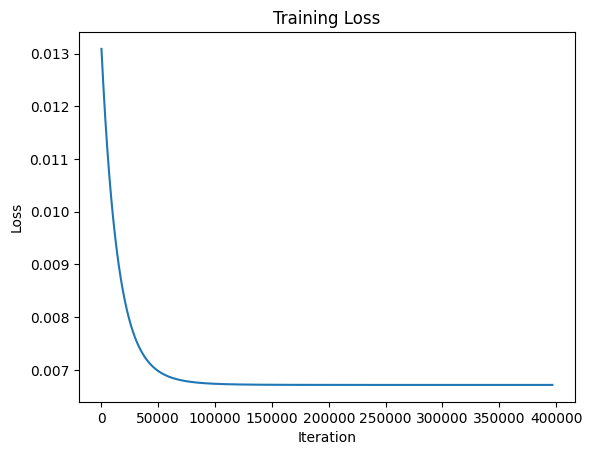

In [37]:
loss_df = pd.DataFrame(loss_history, columns=['loss'])
loss_df['iteration'] = np.arange(396655)
sns.lineplot(x='iteration', y='loss', data=loss_df)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()